In [ ]:
using Pkg
Pkg.activate("../")

using ConnectedInformation

# Compartison NSB algorithm results to this package results

1000 random probability distributions with 4 binary variables were generated and given both algoritms to compare results.

For nsb algorithm, the number of occurances of one state was 1000000 * prpbability of this state, to reduce "undersmapling" effect on result. It was needed to multiply every result to `log2(e)` constant to get the result in form of logarithm of base 2.

Afterwards, output of nsb algorithm was compared to this project approximation of entropy consistent with up to 2- and 4-dimensional entropy constraints.  

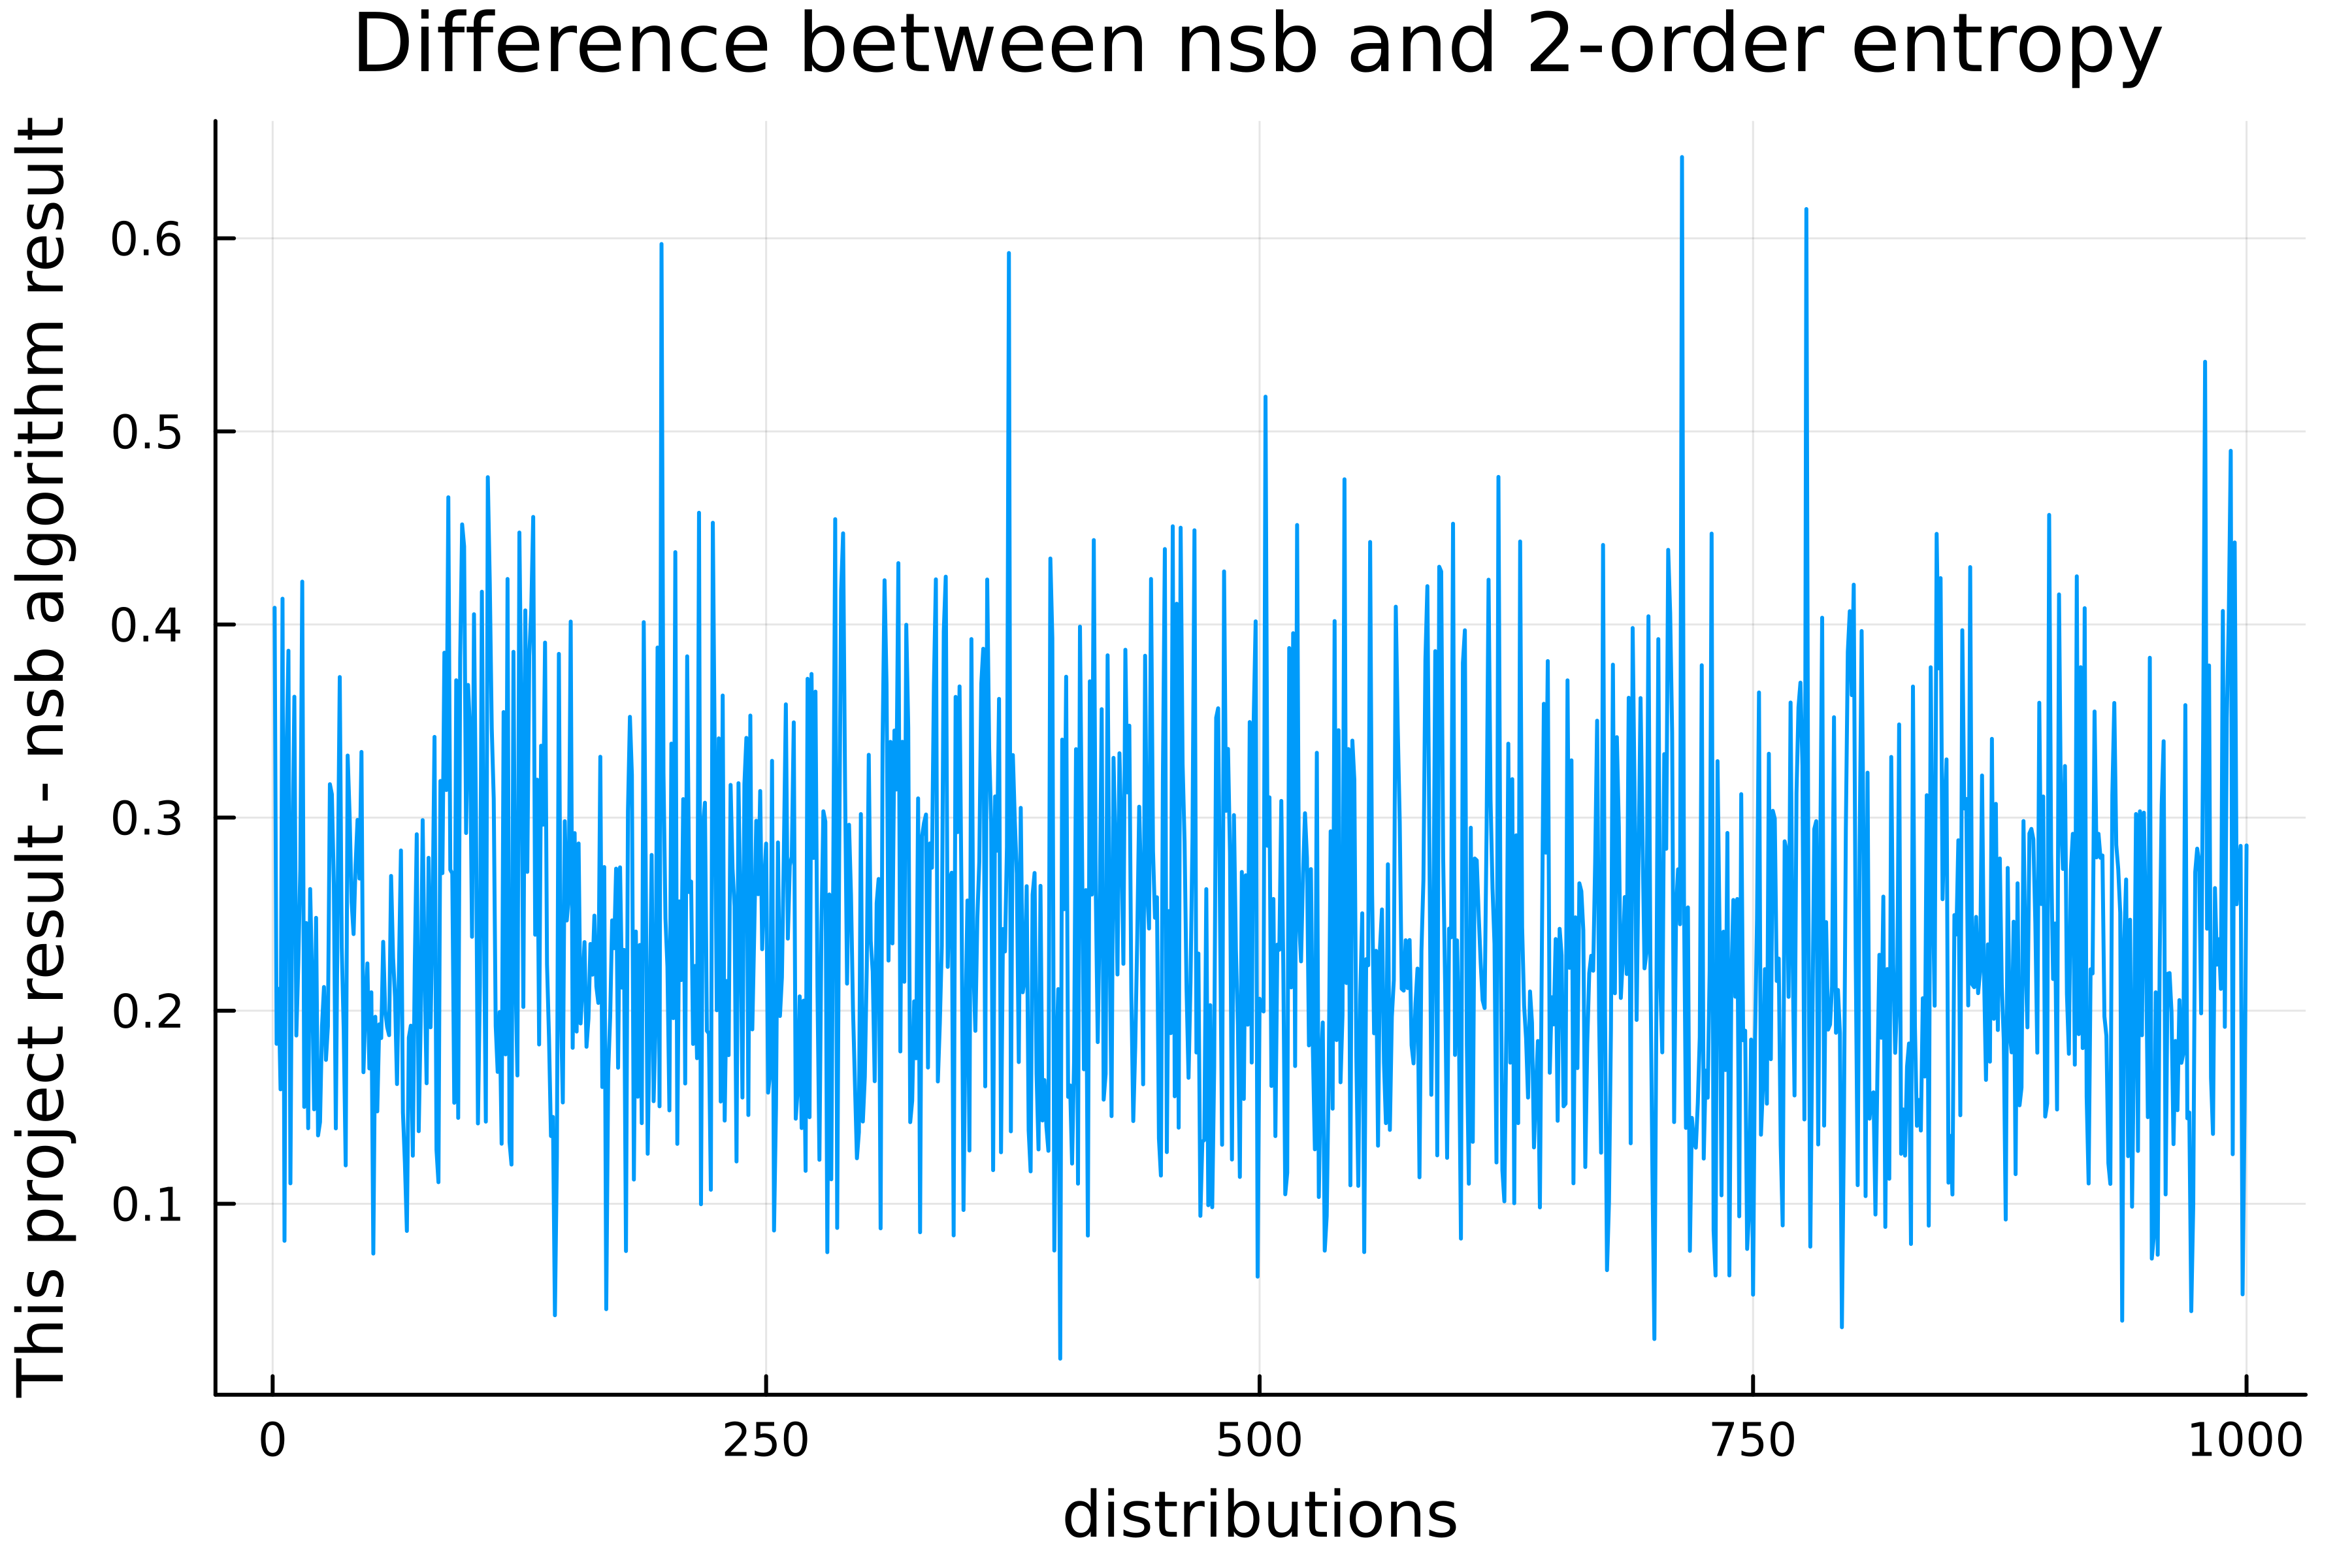

In [42]:
using Plots
using Serialization
using MAT

nsb_results = matread("../resources/comparison_to_nsb/nsb_matlab_results.mat")["results"]

alg_results = Vector{Float64}()
data = deserialize("../resources/comparison_to_nsb/random_nsb_1000.ser")
entropies_for_prob_tables = data["entropies"]
for entropies in entropies_for_prob_tables
    estimated_max_entropies = estimate_max_entropies(4, [2, 2, 2, 2], entropies)
    push!(alg_results, estimated_max_entropies[2])
end

y = Vector{Float64}()
x = 1:1000
for (nsb_res, alg_res) in zip(nsb_results[:, 1], alg_results)
    # nsb_entropy, nsb_deviation = nsb_res
    push!(y, alg_res - (nsb_res * log2(ℯ)))
end

plot(
    x, y,  
    legend=false,
    title="Difference between nsb and 2-order entropy", 
    dpi=600)
xlabel!("distributions")
ylabel!("This project result - nsb algorithm result")
# savefig("nsb_vs_2_order_diff.png")

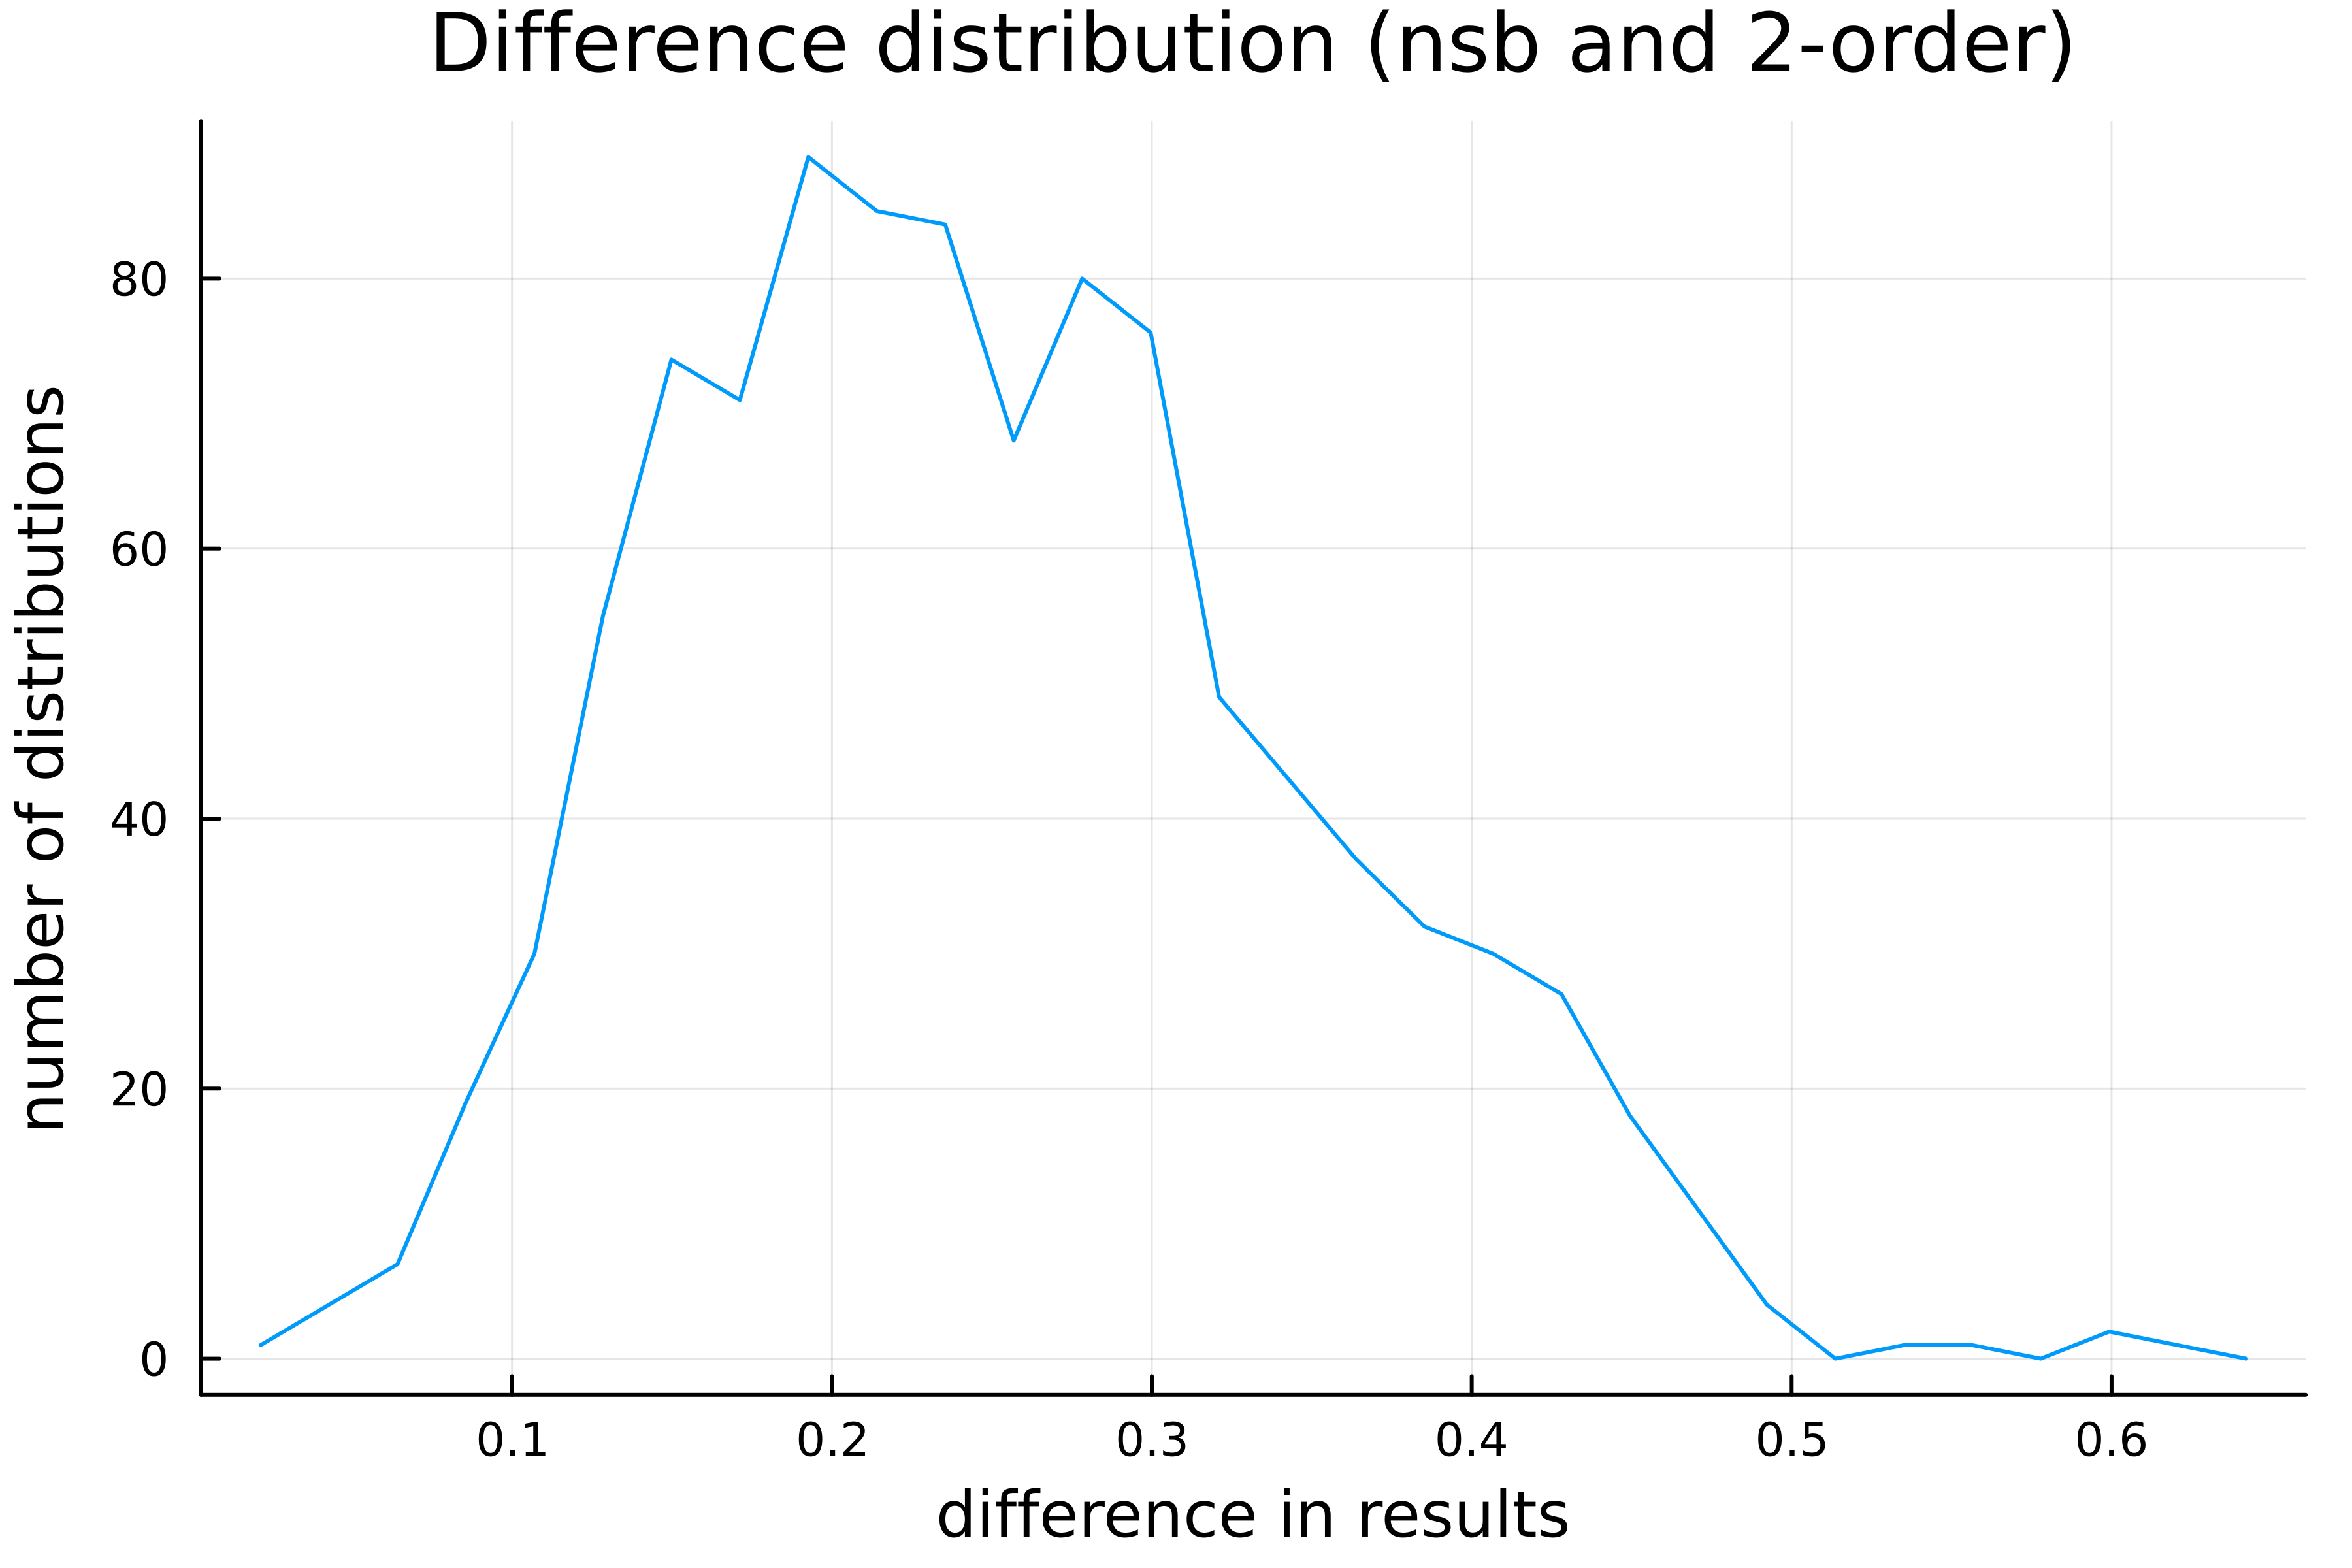

In [43]:
using Plots
using Serialization
using MAT

nsb_results = matread("../resources/comparison_to_nsb/nsb_matlab_results.mat")["results"]

alg_results = Vector{Float64}()
data = deserialize("../resources/comparison_to_nsb/random_nsb_1000.ser")
entropies_for_prob_tables = data["entropies"]
for entropies in entropies_for_prob_tables
    estimated_max_entropies = estimate_max_entropies(4, [2, 2, 2, 2], entropies)
    push!(alg_results, estimated_max_entropies[2])
end

diff = Vector{Float64}()
for (nsb_res, alg_res) in zip(nsb_results[:, 1], alg_results)
    # nsb_entropy, nsb_deviation = nsb_res
    push!(diff, alg_res - (nsb_res * log2(ℯ)))
end

min_diff = 0
max_diff = maximum(y) 

bins_n = 30
bin_size = (max_diff - min_diff) / bins_n 
bins = zeros(bins_n)

cur_bin_min = min_diff
for b_i=1:bins_n
    for res in diff
        if cur_bin_min <= res < (cur_bin_min + bin_size)
            bins[b_i] += 1
        end  
    end
    cur_bin_min += bin_size
end

x = [min_diff + (i*bin_size) for i=1:bins_n]

plot(
    x, bins,  
    legend=false,
    title="Difference distribution (nsb and 2-order)", 
    dpi=600)
xlabel!("difference in results")
ylabel!("number of distributions")
# savefig("nsb_vs_2_order_distr.png")

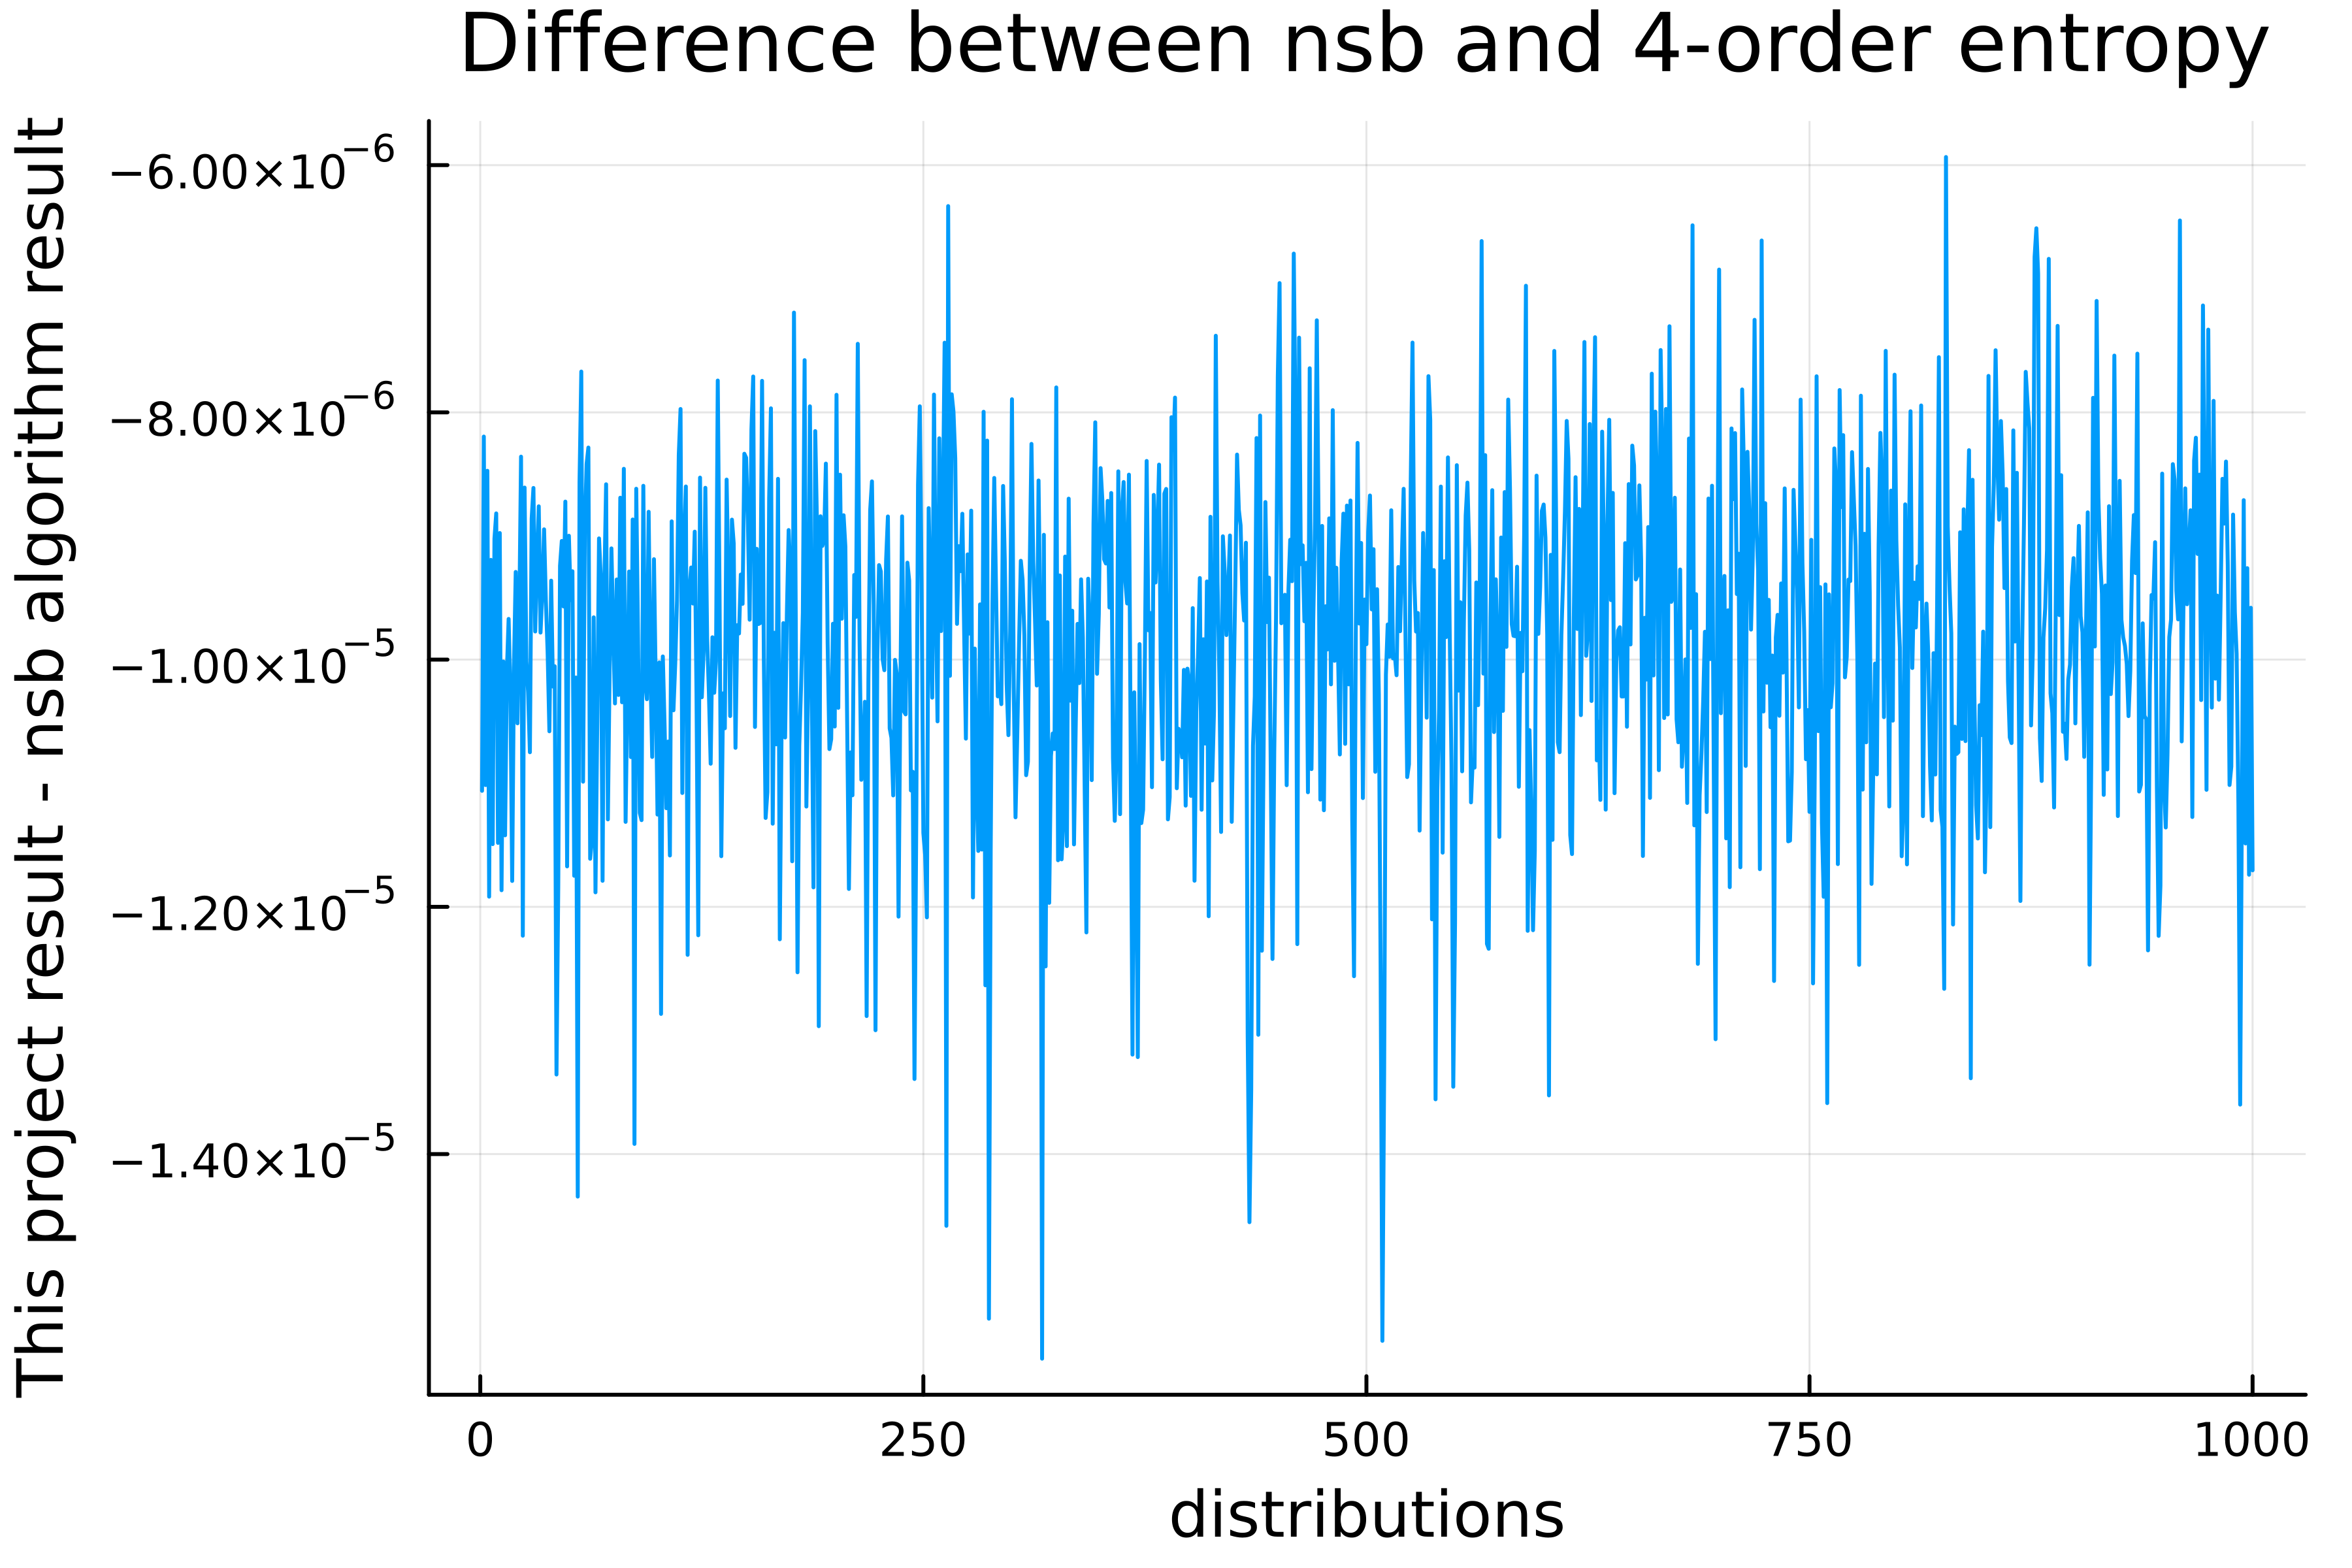

In [44]:
using Plots
using Serialization
using MAT

nsb_results = matread("../resources/comparison_to_nsb/nsb_matlab_results.mat")["results"]

alg_results = Vector{Float64}()
data = deserialize("../resources/comparison_to_nsb/random_nsb_1000.ser")
entropies_for_prob_tables = data["entropies"]
for entropies in entropies_for_prob_tables
    estimated_max_entropies = estimate_max_entropies(4, [2, 2, 2, 2], entropies)
    push!(alg_results, estimated_max_entropies[4])
end

y = Vector{Float64}()
x = 1:1000
for (nsb_res, alg_res) in zip(nsb_results[:, 1], alg_results)
    # nsb_entropy, nsb_deviation = nsb_res
    push!(y, alg_res - (nsb_res * log2(ℯ)))
end

plot(
    x, y,  
    legend=false,
    title="Difference between nsb and 4-order entropy", 
    dpi=600)
xlabel!("distributions")
ylabel!("This project result - nsb algorithm result")
# savefig("nsb_vs_4_order_diff.png")

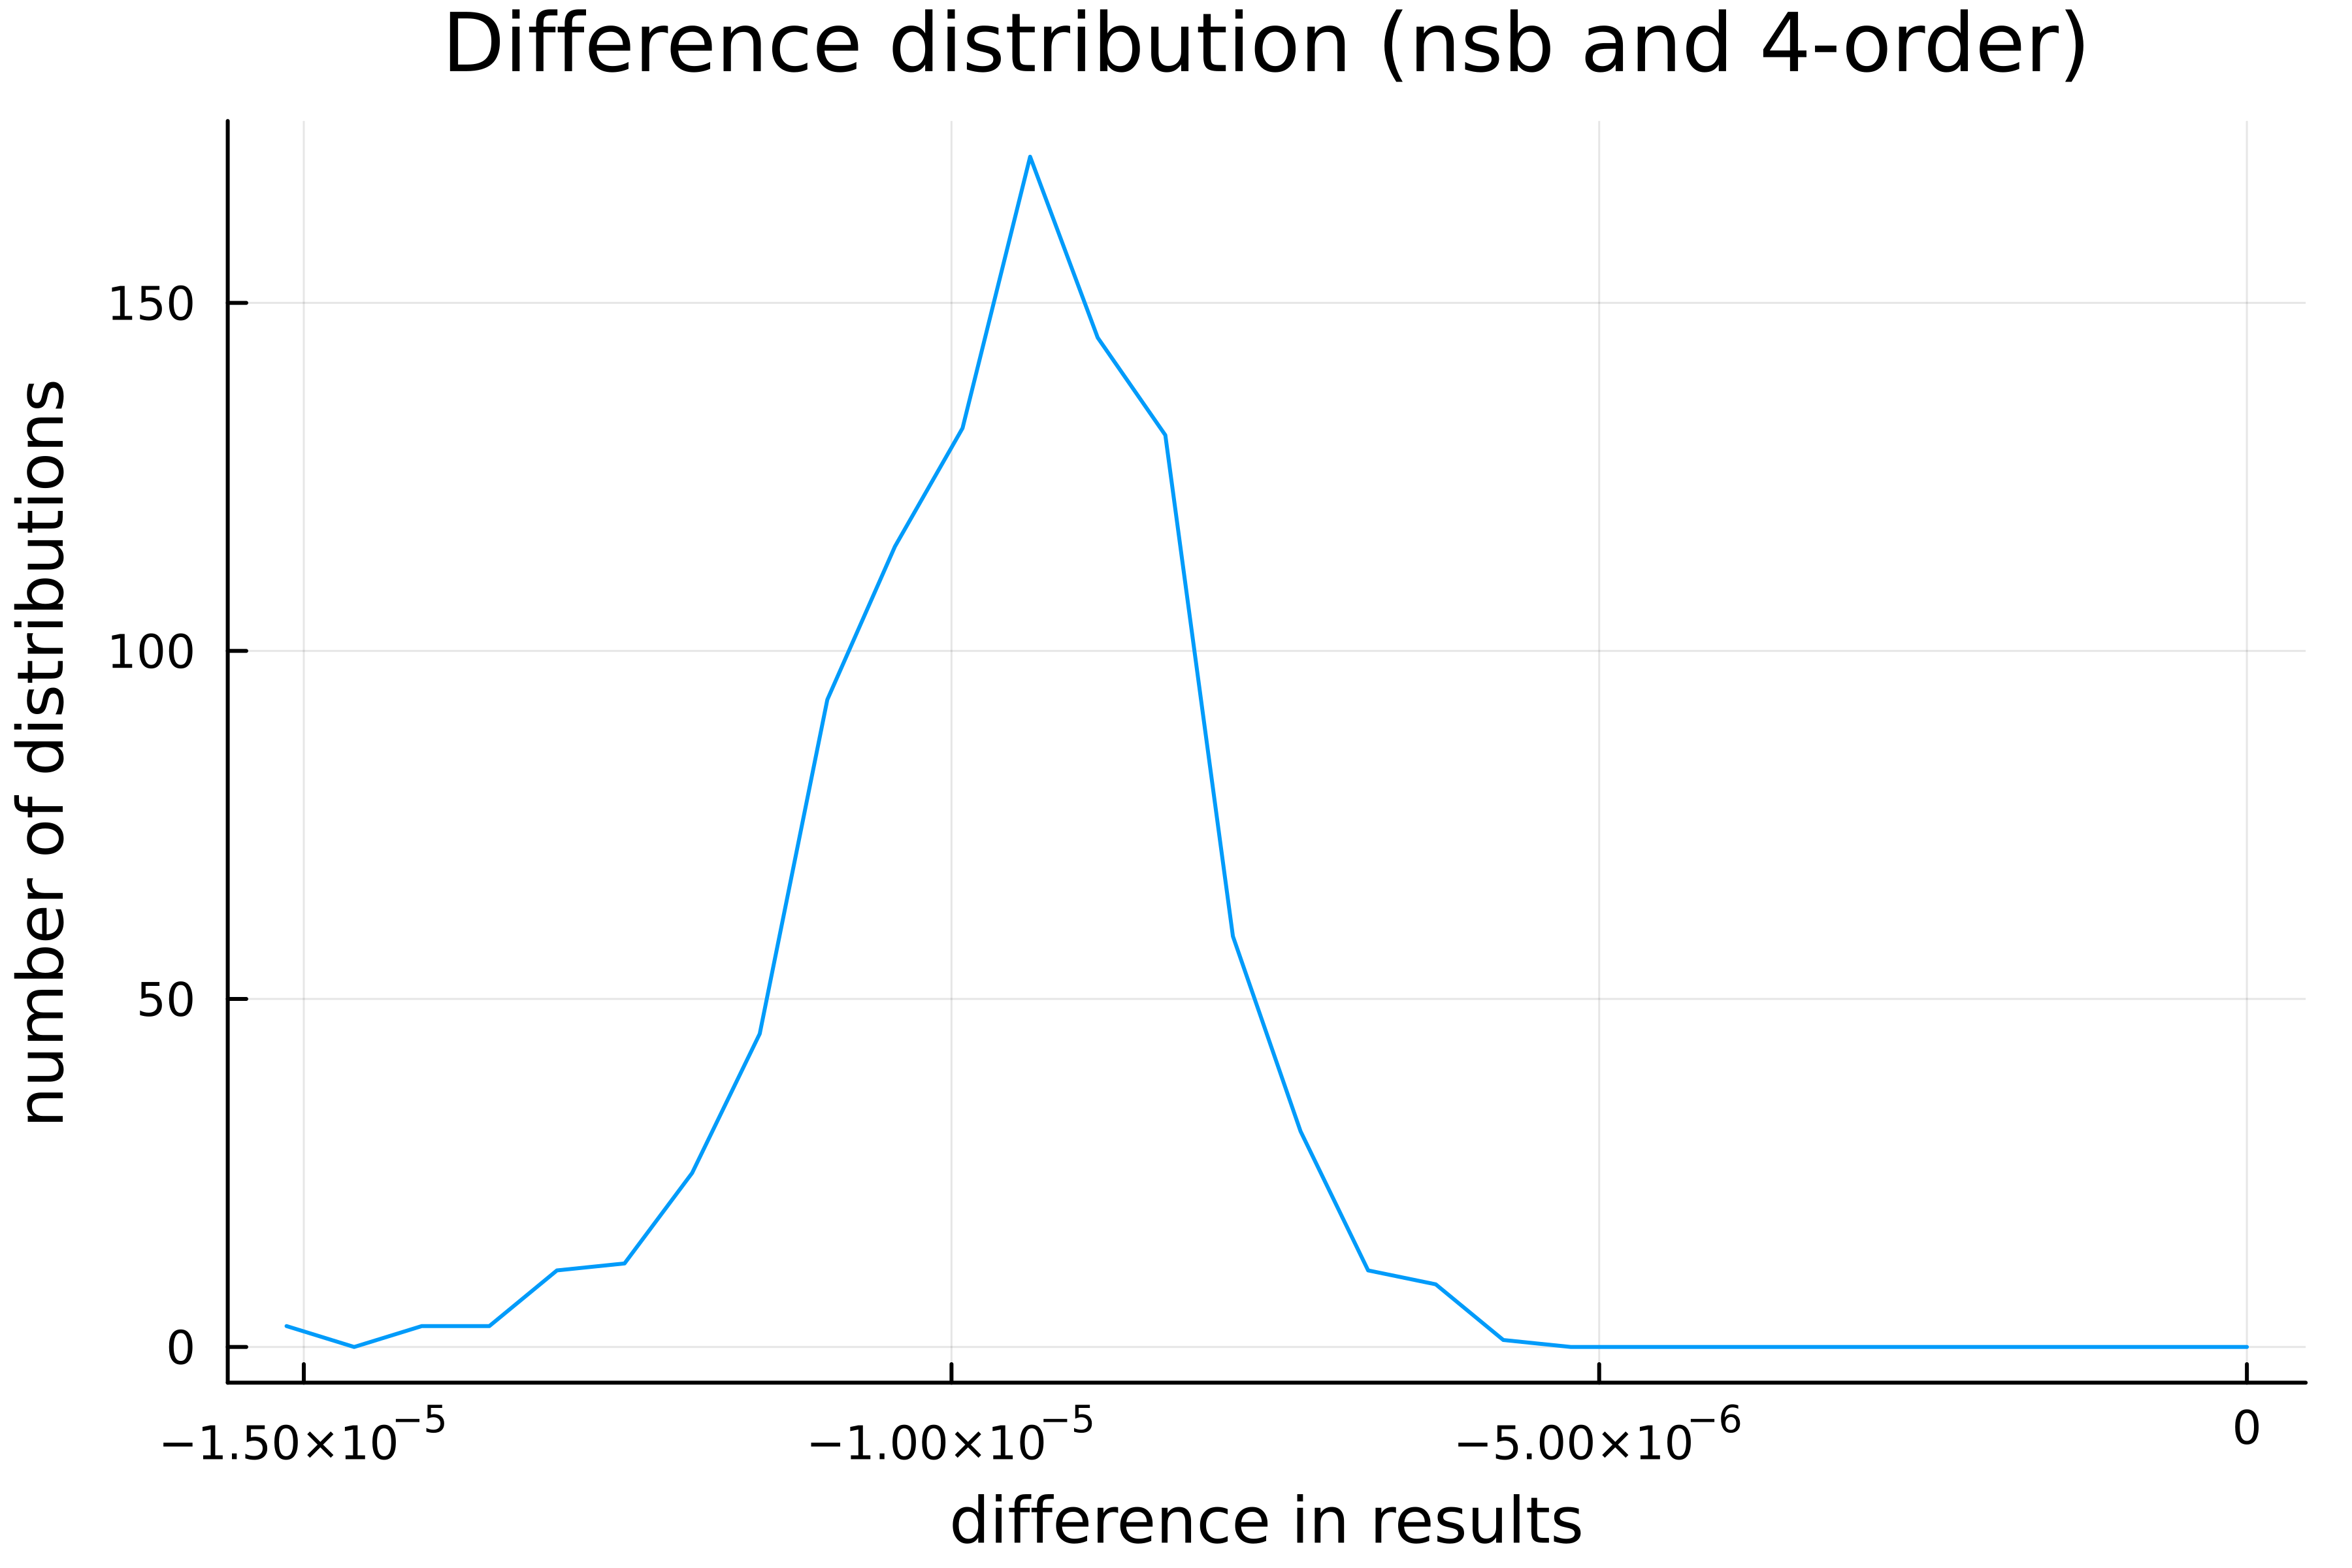

In [45]:
using Plots
using Serialization
using MAT

nsb_results = matread("../resources/comparison_to_nsb/nsb_matlab_results.mat")["results"]

alg_results = Vector{Float64}()
data = deserialize("../resources/comparison_to_nsb/random_nsb_1000.ser")
entropies_for_prob_tables = data["entropies"]
for entropies in entropies_for_prob_tables
    estimated_max_entropies = estimate_max_entropies(4, [2, 2, 2, 2], entropies)
    push!(alg_results, estimated_max_entropies[4])
end

diff = Vector{Float64}()
for (nsb_res, alg_res) in zip(nsb_results[:, 1], alg_results)
    # nsb_entropy, nsb_deviation = nsb_res
    push!(diff, alg_res - (nsb_res * log2(ℯ)))
end

min_diff = minimum(y)
max_diff = 0 

bins_n = 30
bin_size = (max_diff - min_diff) / bins_n 
bins = zeros(bins_n)

cur_bin_min = min_diff
for b_i=1:bins_n
    for res in diff
        if cur_bin_min <= res < (cur_bin_min + bin_size)
            bins[b_i] += 1
        end  
    end
    cur_bin_min += bin_size
end

x = [min_diff + (i*bin_size) for i=1:bins_n]

plot(
    x, bins,  
    legend=false,
    title="Difference distribution (nsb and 4-order)", 
    dpi=600)
xlabel!("difference in results")
ylabel!("number of distributions")
# savefig("nsb_vs_4_order_distr.png")

In [ ]:
using Plots
using Serialization
using MAT

nsb_results = matread("../resources/comparison_to_nsb/nsb_matlab_results.mat")["results"]

alg_results = Vector{Float64}()
data = deserialize("../resources/comparison_to_nsb/random_nsb_1000.ser")
entropies_for_prob_tables = data["entropies"]
for entropies in entropies_for_prob_tables
    estimated_max_entropies = estimate_max_entropies(4, [2, 2, 2, 2], entropies)
    push!(alg_results, estimated_max_entropies[2])
end

y = Vector{Float64}()
x = 1:1000
for (nsb_res, alg_res) in zip(nsb_results[:, 1], alg_results)
    # nsb_entropy, nsb_deviation = nsb_res
    push!(y, alg_res - nsb_res * log2(ℯ))
end

plot(
    x, [y, nsb_results[:, 2] .* log2(ℯ)], 
    label=["diff" "deviation"],
    title="Alg res - nsb bin res", 
    dpi=200)
# xlabel!("approximated entropy")
# ylabel!("number of distributions")
# savefig("entropies_1000.png")

In [ ]:
using Plots
using Serialization
using MAT

nsb_results = matread("../resources/comparison_to_nsb/nsb_matlab_results.mat")["results"]

alg_results = Vector{Float64}()
data = deserialize("../resources/comparison_to_nsb/random_nsb_1000.ser")
entropies_for_prob_tables = data["entropies"]
for entropies in entropies_for_prob_tables
    estimated_max_entropies = estimate_max_entropies(4, [2, 2, 2, 2], entropies)
    push!(alg_results, estimated_max_entropies[2])
end

y_alg = Vector{Float64}()
y_nsb = Vector{Float64}()
y_nsb_up_dev = Vector{Float64}()
y_nsb_low_dev = Vector{Float64}()
x = 1:1000
for (nsb_res, nsb_dev, alg_res) in zip(nsb_results[:, 1], nsb_results[:, 2], alg_results)
    push!(y_nsb, nsb_res * log2(ℯ))
    push!(y_nsb_up_dev, (nsb_res + nsb_dev) * log2(ℯ))
    push!(y_nsb_low_dev, (nsb_res - nsb_dev) * log2(ℯ))
end

plot(
    x, [alg_results, y_nsb, y_nsb_up_dev, y_nsb_low_dev],
    label=["y_alg" "y_nsb" "y_nsb_up_dev" "y_nsb_low_dev"], 
    title="algorithms results", 
    dpi=200)